# Аналитика в Яндекс.Афише

#### Описание проекта

Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.  
У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:  
- лог сервера с данными о посещениях сайта Яндекс.Афиши,  
- выгрузка всех заказов за этот период,  
- статистика рекламных расходов.  

#### Вы изучите:
- как люди пользуются продуктом,  
- когда они начинают покупать,  
- сколько денег приносит каждый клиент  
- когда клиент окупается.  

**Инструкция по выполнению проекта:**  

- Шаг 1. Загрузите данные и подготовьте их к анализу  
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:  

/datasets/visits_log.csv.   
/datasets/orders_log.csv.   
/datasets/costs.csv.   

**Шаг 2. Постройте отчёты и посчитайте метрики**

**Продукт** 
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

**Продажи**

- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)

**Маркетинг**

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)
- Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

**Шаг 3. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?** 

- Какие источники/платформы вы бы порекомендовали? Объясните свой выбор: на какие метрики вы ориентируетесь? Почему? Какие выводы вы сделали, узнав значение метрик?  

Оформление: Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.  

**Описание данных**  

Таблица visits (лог сервера с информацией о посещениях сайта):  
Uid — уникальный идентификатор пользователя  
Device — категория устройства пользователя  
Start Ts — дата и время начала сессии  
End Ts — дата и время окончания сессии  
Source Id — идентификатор рекламного источника, из которого пришел пользователь  
Таблица orders (информация о заказах):  
Uid — уникальный id пользователя, который сделал заказ  
Buy Ts — дата и время заказа  
Revenue — выручка Яндекс.Афиши с этого заказа  
Таблица costs (информация о затратах на маркетинг):  
source_id — идентификатор рекламного источника  
dt — дата  
costs — затраты на этот рекламный источник в этот день  

## 1.Загружаем

In [26]:
# стандартные модули
import pandas as pd
from scipy import stats as st
import numpy as np

# графика
from matplotlib import pyplot as plt
import seaborn as sns


# загрузка файла
from pathlib import Path
import os
import urllib.request

In [27]:
# Загрузка датасета

# создать папку, если нет
Path('datasets').mkdir(parents=True, exist_ok = True)
def get_file(file_name, url):
# test 
    if not os.path.exists(file_name):
        print(file_name, 'file not found, it will be dowload from net')
#download
        _=urllib.request.urlretrieve(url, file_name)
# dict with name 
urls = {
'data':('/datasets/visits_log.csv','https://code.s3.yandex.net/datasets/visits_log.csv'),
    'data1':('/datasets/orders_log.csv','https://code.s3.yandex.net/datasets/orders_log.csv'),
        'data2':('/datasets/costs.csv','https://code.s3.yandex.net/datasets/costs.csv'),
}
[get_file(*urls[k]) for k in urls]

visits = pd.read_csv(urls['data'][0], sep=',')
orders = pd.read_csv(urls['data1'][0], sep=',')
costs = pd.read_csv(urls['data2'][0], sep=',')

## 2. Смотрим

In [28]:
def check_func(df):
    '''
    Функция проверяет на дубли, выводит информацию по таблице 
    Function for checking the database after loading.
    '''
    print('Duplicates', df.duplicated().sum(), '\n')
    print(df.info())
    display(df.head(3))
    display(df.describe())

In [29]:
check_func(visits)

Duplicates 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [30]:
check_func(orders)

Duplicates 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [31]:
check_func(costs)

Duplicates 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


## 3. Предобработка

In [32]:
# избавляемся от заглавных букв в название колонок с признаками
# I'll make all the letters small

for i in [visits, orders, costs]:
    i.columns = i.columns.str.lower()

In [33]:
# в названии некоторых столбцов есть пробелы, заменим их на нижнее подчеркивание
# Some columns have white space between words. Change it to bottom line.

visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']

In [34]:
# Проверка корректности времнных данных
# Check  time data

visits.loc[visits.start_ts > visits.end_ts ]

,device,end_ts,source_id,start_ts,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


Имеются два события с временем начала позже времени завершения. В рамках поставленной задачи можно игнорировать. Сообщить о факте программистам. 

In [35]:
# check revenue
orders.query('revenue < 0')

,buy_ts,revenue,uid


In [36]:
# show type of device count
print(visits['device'].value_counts())

desktop    262567
touch       96833
Name: device, dtype: int64


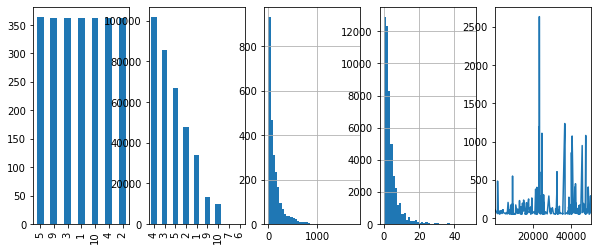

In [37]:
# show data distribution

plt.figure()
plt.subplot(1, 5, 1)
costs['source_id'].value_counts().plot(kind='bar', figsize=(10,4))
plt.subplot(1, 5, 2)
visits['source_id'].value_counts().plot(kind='bar', figsize=(10,4))
plt.subplot(1, 5, 3)
costs['costs'].hist(bins=40)
plt.subplot(1, 5, 4)
orders[orders['revenue'] < 50]['revenue'].hist(bins=40)
plt.subplot(1, 5, 5)
orders[orders['revenue'] > 50]['revenue'].plot()

**переведем все даты из формата object в datetime**  
change object to datatime

In [38]:
visits[['end_ts', 'start_ts']] = visits[['end_ts', 'start_ts']].apply(lambda i : pd.to_datetime(i, errors='coerce'))
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

## 4. Изучаем

**Постройте отчёты и посчитайте метрики**  

**Продукт**

Сколько людей пользуются в день, неделю, месяц?  
Сколько сессий в день?  
Сколько длится одна сессия?  
Как часто люди возвращаются?  

Для решения первой задачи воспользуемся таблицей visits

- Сколько людей пользуются в день, неделю, месяц?

In [39]:
# функция для подсчета уникальных пользователей
# creating a function for counting unique users

def dau_wau_mau(df, key):
    dau_wau_mau = df.groupby(key).agg({'uid': 'nunique'})
    return dau_wau_mau

In [40]:
# Автоматизация части графиков в работе
# creating a functions for plotting

def easy_plot(df, title, xlabel, ylabel):
    df.plot(figsize=(15, 5), grid=True, rot=45 )
    plt.title(title, fontsize=16, color='b')
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=14)
    return

def easy_hist(df, bins,  title, xlabel, ylabel):
    df.hist(bins=bins, grid=True, )
    plt.title(title, fontsize=16, color='b')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    return

def heatmap_easy(df,  title):
    sns.set(style='white')
    plt.figure(figsize=(17, 9))
    plt.title(title)
    sns.heatmap(df, annot=True, fmt='.1%',vmax=0.10,cmap="cool")
    return

In [41]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [42]:
# create several date features

visits['date'] = visits['start_ts'].dt.date
visits['year'] = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits['week'] = visits['start_ts'].dt.week

In [43]:
key = ['date']

print('Среднее количество пользователей в день:', int(dau_wau_mau(visits, key).mean()),'человек', end='\n\n')

key = ['year', 'week']
print('Среднее количество пользователей в неделю:', int(dau_wau_mau(visits, key).mean()),'человек', end='\n\n')

key = ['year', 'month']
print('Среднее количество пользователей в месяц:', int(dau_wau_mau(visits, key).mean()),'человек', end='\n\n')

Среднее количество пользователей в день: 907 человек

Среднее количество пользователей в неделю: 5716 человек

Среднее количество пользователей в месяц: 23228 человек



 Из графиков dau и wau новой наглядной информации мало  
 Из графика mau видно,что рост посетителей так и их уход наблюдался среди посетителей пользующихся компьютером.
 Количество посетителей посещающих сайт с мобильных устройств меняется слабо.  
С ростом рекламного бюджета их количество увеличилось примерно в два раза, но в отличие от посетителей пользующихся компьютером их количество не стало уменьшаться с 11.2017  

In [44]:
# separate sessions by type of device

visits_touch = visits.query('device == "touch" ').copy()
visits_desktop = visits.query('device == "desktop" ').copy()

Text(0, 0.5, 'Посетители')

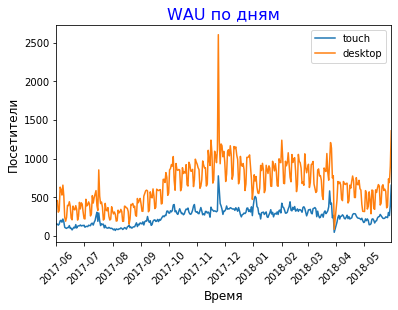

In [45]:
# plotting WAU by days

dau_touch = dau_wau_mau(visits_touch, ['date'])
dau_desktop = dau_wau_mau(visits_desktop, ['date'])
dau_report = pd.DataFrame(data=dau_touch)
dau_report['desktop'] = dau_desktop
dau_report.columns = ['touch', 'desktop']
dau_report.plot(rot=45)
plt.title('WAU по дням', fontsize=16, color='b')
plt.xlabel('Время', fontsize=12)
plt.ylabel('Посетители', fontsize=12)

Text(0, 0.5, 'Посетители')

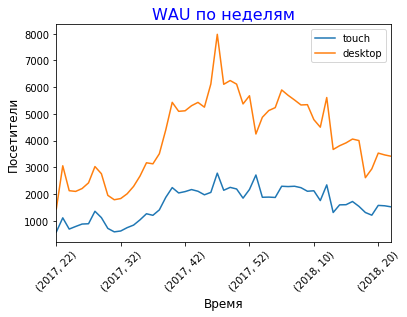

In [46]:
# plotting WAU by weeks

wau_touch = dau_wau_mau(visits_touch, ['year', 'week'])
wau_desktop = dau_wau_mau(visits_desktop, ['year', 'week'])
wau_report = pd.DataFrame(data=wau_touch)
wau_report['desktop'] = wau_desktop
wau_report.columns = ['touch', 'desktop']
wau_report.plot(rot=45)
plt.title('WAU по неделям', fontsize=16, color='b')
plt.xlabel('Время', fontsize=12)
plt.ylabel('Посетители', fontsize=12)

Text(0, 0.5, 'Посетители')

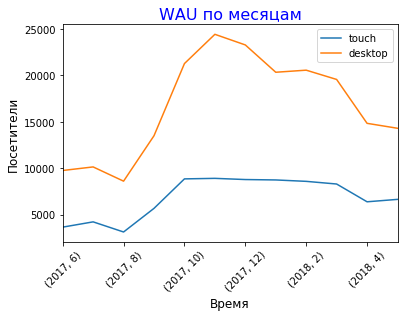

In [47]:
# plotting WAU by month

mau_touch = dau_wau_mau(visits_touch, ['year', 'month'])
mau_desktop = dau_wau_mau(visits_desktop, ['year', 'month'])
mau_report = pd.DataFrame(data=mau_touch)
mau_report['desktop'] = mau_desktop
mau_report.columns = ['touch', 'desktop']
mau_report.plot(rot=45)
plt.title('WAU по месяцам', fontsize=16, color='b')
plt.xlabel('Время', fontsize=12)
plt.ylabel('Посетители', fontsize=12)

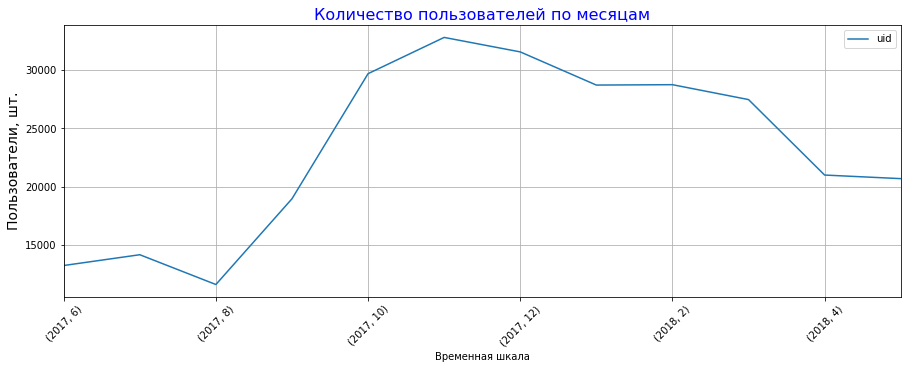

In [48]:
# users by month
mau = dau_wau_mau(visits, key)

easy_plot(mau, 
          title = 'Количество пользователей по месяцам',
          xlabel = 'Временная шкала',
          ylabel = 'Пользователи, шт.'
         )

**Вывод:** 
Среднее количество пользователей около 900 в день или 23_000 в месяц. Для крупного сервиса не так, чтобы много.  
Резкий рост с 08.2017 возможно связан с ростом бюджета рекламной кампании, это будет видно из данных, исследуемых далее.  
Так же учитывая специфику сервиса рост числа пользователей может быть связан с началом театрального сезона и учебного года.

Начало тенденция к спаду активности пользователей заметно с 11.2017, что странно так как декабрь и январь — это целая череда праздников и выходных, плюс школьные каникулы. Возможно, стоит исследовать работу сайта в этот период более внимательно.


- Сколько сессий в день?

Среднее количество сессий в день:  987 заходов



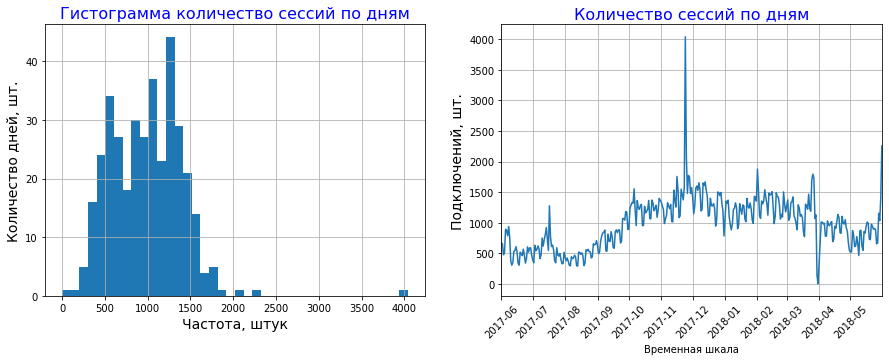

In [49]:
# histogramm and plotting sessions by day

session_per_day = visits.groupby('date')['uid'].count()
print('Среднее количество сессий в день: ', int(session_per_day.mean()), 'заходов', end='\n\n')

plt.figure()
plt.subplot(1, 2, 1)
easy_hist(session_per_day, 
          bins=40, 
          title = 'Гистограмма количество сессий по дням',
          xlabel = 'Частота, штук',
          ylabel = 'Количество дней, шт.'
         )
plt.subplot(1, 2, 2)
easy_plot(session_per_day, 
          title = 'Количество сессий по дням',
          xlabel = 'Временная шкала',
          ylabel = 'Подключений, шт.'
         )

**Вывод:**  
Количество сессий несколько превышает количество уникальных пользователей. Среднее количество сессий в день:  987. Это нормально - пользователь нашел сайт, запомнил и вышел, в свободное время зашел и изучил внимательней.

На временном графике виден выброс в 11.2017 и в этот же месяц начала падать активность пользователей. Возможно это связанные события. Были ли проблемы в работе сайта, качестве сервиса, проблемы с платежами?

- Сколько длится одна сессия?  

Средняя продолжительность сессии - ASL

Среднее время продолжительности сессии за всю историю наблюдения: 621 сек.



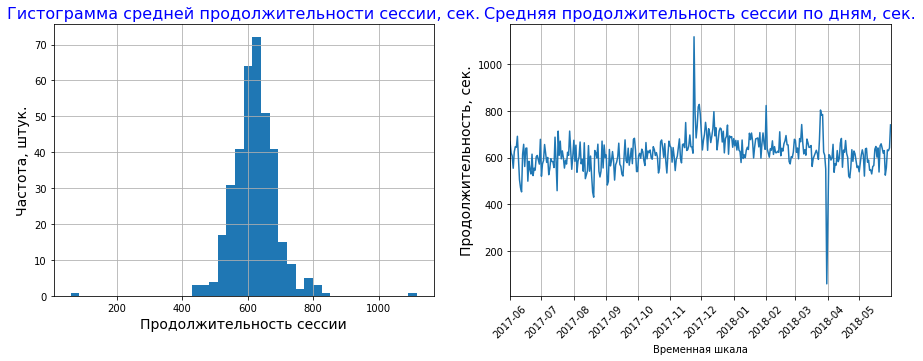

In [50]:
# the average session duration
visits['duration'] = (visits['end_ts'] -  visits['start_ts']).dt.seconds

ASL = visits.groupby('date')['duration'].mean()

print('Среднее время продолжительности сессии за всю историю наблюдения:', int((ASL.mean())), 'сек.', end='\n\n')

plt.figure()
plt.subplot(1, 2, 1)
easy_hist(ASL, 
          bins=40, 
          title = 'Гистограмма средней продолжительности сессии, сек.',
          xlabel = 'Продолжительность сессии',
          ylabel = 'Частота, штук.'
         )

plt.subplot(1, 2, 2)
easy_plot(ASL, 
          title = 'Средняя продолжительность сессии по дням, сек.',
          xlabel = 'Временная шкала',
          ylabel = 'Продолжительность, сек.'
         )

In [51]:
print('Наиболее частое время сессии', visits['duration'].mode()[0], 'сек.')

Наиболее частое время сессии 60 сек.


**Вывод:**  
Наиболее часто сессии длятся менее 60 секунд. Это нормально люди зашли с поиска , поняли, что не нужно и вышли.  

Если человек зашел купить билет, то процесс оформления занимает (предполагаю) от нескольких минут до нескольких десятков минут.

Средняя продолжительность сессии составляет 620 секунд и сильно отличается от наиболее частой моды. Это тоже нормально: незакрытое окно браузера и многие другие причины могут давать сверхдлинные сессии, которые в итоге естественно увеличат среднее.

- Как часто люди возвращаются?

Одна из метрик описывающих come back-и пользователей Retention Rate , или коэффициент удержания.
Расчитаем его.
1. Получим первую дату входа клиента.
2. Разобьем по кагортам.
3. Вычислим Retention Rate


In [52]:
# первый визит пользователя
# the first visit
first_visits_date = visits.groupby('uid')['date'].min()

# добавим в таблицу
first_visits_date.name = 'first_visits_date'
visits = pd.merge(visits,first_visits_date,on='uid',how='left')

In [53]:
# месяц первой покупки
# month first purchase

# Введем дополнительные столбцы для дальнейшего анализа и приведем к нужному типу

visits['first_month'] = visits['first_visits_date'].astype('datetime64[M]')
visits['session_month'] = visits['date'].astype('datetime64[M]')

In [54]:
# Время жизни кагорты
# cohort lifetime

visits['cohort_lifetime'] = ((visits['session_month'] - visits['first_month']) / np.timedelta64(1,'M')).round().astype('int')
visits['first_month'] = visits['first_month'].dt.strftime('%Y-%m')

In [55]:
# когорты по времени жизни

cohorts = visits.groupby(['first_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

# Посчитаем исходное количество пользователей по кагортам и присвоим новоеимя

inital_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_month','uid']]
inital_users_count = inital_users_count.rename(columns={'uid':'cohort_users'})

# Retention Rate

cohorts = cohorts.merge(inital_users_count,on='first_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

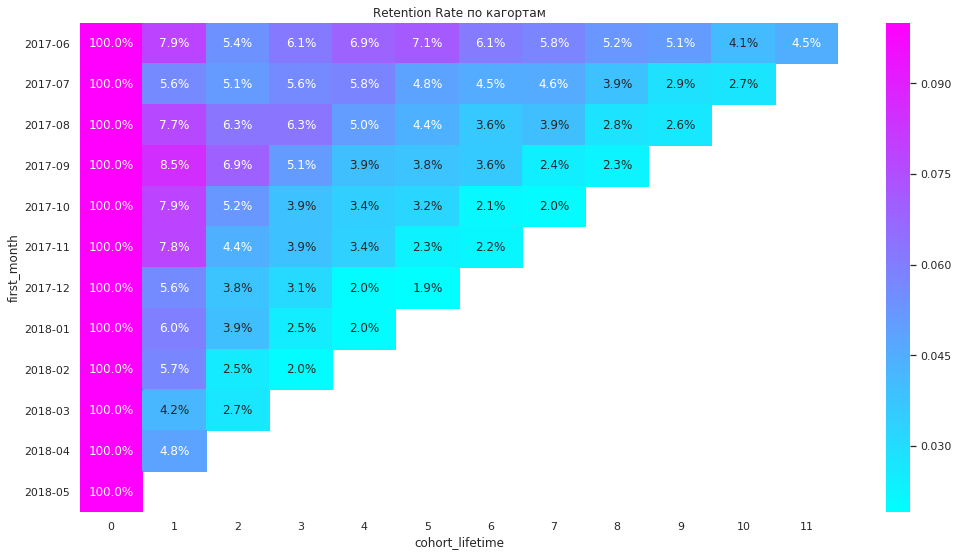

In [56]:
# визуализация
retention_pivot = cohorts.pivot_table(
        index='first_month',
                columns='cohort_lifetime',
                    values='retention',aggfunc='sum'
)
retention_pivot.fillna('')

heatmap_easy(
    retention_pivot, 
    title = 'Retention Rate по кагортам'
)

### Вывод:  
Более чем в 10 раз сайт теряет привлеченных клиентов. Учитывая специфику (продажа билетов), это нормально и неплохо. Данный товар не есть вещь первой необходимости и средний человек ходит куда-то редко чаще чем раз в месяц.  

Несколько десятков человек из каждой когорты становятся постоянными покупателями.  

**Продажи**

- Когда люди начинают покупать?  
- Сколько раз покупают за период?  
- Какой средний чек?  
- Сколько денег приносят? (LTV)  

- Когда люди начинают покупать?

In [57]:
# first order
first_orders = orders.groupby('uid')['buy_ts'].min()

# добавим в таблицу
first_orders.name = 'first_orders_date'
orders = pd.merge(orders,first_orders,on='uid',how='outer')

In [58]:
# Добавим в таблицу дату первого визита
# add a date of first visit
orders = pd.merge(orders,first_visits_date,on='uid',how='outer')

In [59]:
# удалим тех, кто ничего не купил
# delete users without purchase

orders = orders.dropna()
orders['first_visits_date'] = pd.to_datetime(orders['first_visits_date'])

In [60]:
orders['time_to_buy'] = pd.DatetimeIndex(orders['first_orders_date'] - orders['first_visits_date']).hour

orders['time_to_buy_sec'] = (orders['first_orders_date'] - orders['first_visits_date']).dt.seconds

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  """Entry point for launching an IPython kernel.


In [61]:
# Среднее время между первым входом и покупкой для всех данных в часах
# average time between first visit and order

print(orders['time_to_buy'].mode()[0], 'часов')

# Среднее время между первым входом и покупкой при условии покупки в первый час в секундах
# average time between first visit and order for first hour
print(orders.loc[orders['time_to_buy_sec'] < 3600]['time_to_buy_sec'].mode()[0], 'секунд')

11 часов
360 секунд


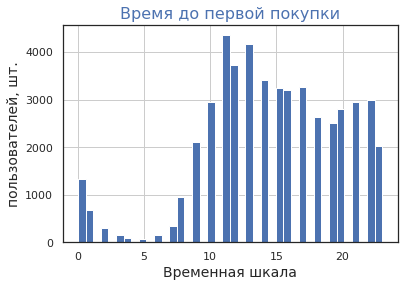

In [62]:
easy_hist(orders['time_to_buy'], 
          bins=40, 
          title = 'Время до первой покупки',
          xlabel = 'Временная шкала',
          ylabel = 'пользователей, шт.'
         )

**Выводы:**  
Можно выделить две группы клиентов. 
1. Зашли и купили - среднее время до покупки 360 секунд. Это совсем неплохо. Человек не испытывает проблем с функционалом сайта и способен с первого раза быстро совершить покупку.

2. Зашли и ушли, запомнив. И вернулась в более удобное для покупки время. Этим объясняется длинный шлейф см. график.

Наиболее частая мода 11 часов. Можно предположить, что с утра человек по дороге нашел интересующий его билет и запомнил. А вечером в спокойной обстановке , после работы купил его.

- Сколько раз покупают за период?

In [63]:
# orders by time
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_orders_date'].astype('datetime64[M]')

In [64]:
come_back_buyer = orders.pivot_table(index='first_order_month', columns='order_month', values='revenue', aggfunc='count')
come_back_buyer = come_back_buyer.fillna('')
come_back_buyer

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2354,177,174,226,292,218,276,174,212,153,96,86,
2017-07-01,,2186,100,120,104,72,82,61,50,58,24,53,
2017-08-01,,,1533,108,100,81,85,62,49,78,46,46,
2017-09-01,,,,2933,219,161,164,67,109,108,56,61,
2017-10-01,,,,,4964,314,162,122,129,103,86,125,
2017-11-01,,,,,,4813,397,182,211,136,59,102,
2017-12-01,,,,,,,5052,270,202,179,86,105,
2018-01-01,,,,,,,,3783,224,159,64,78,
2018-02-01,,,,,,,,,4095,222,83,70,


In [66]:
# repeat purchase by cohort

def grabber(cohorts, key1, key2, key3):
    inital_users_count = cohorts[cohorts[key2] == cohorts[key1]][[key1,key3]]
    return inital_users_count
    
def cohorts(df, key1, key2, key3):
    # когорты по времени жизни
    cohorts = orders.groupby([key1, key2]).agg({key3:'nunique'}).reset_index()
    
    # Посчитаем исходное количество пользователей по кагортам и присвоим новоеимя
    
    inital_users_count = grabber(cohorts, key1, key2, key3)
    inital_users_count = inital_users_count.rename(columns={key3:'cohort_users'})
    
    cohorts = cohorts.merge(inital_users_count,on=key1)
    cohorts['come_back'] = cohorts[key3] / cohorts['cohort_users']
    
    cohorts[key1] = cohorts[key1].dt.strftime('%Y-%m')
    cohorts[key2] = cohorts[key2].dt.strftime('%Y-%m')
    
    retention_pivot = cohorts.pivot_table(
        index=key1,
                columns=key2,
                    values='come_back'
    )
    retention_pivot.fillna('')
    
    return retention_pivot

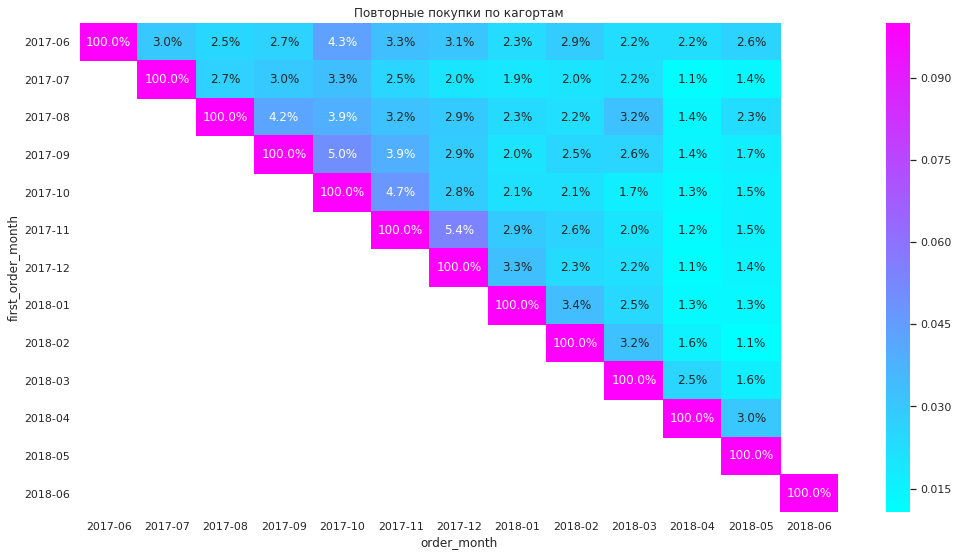

In [67]:

retention_pivot = cohorts(orders, 'first_order_month', 'order_month', 'uid')

heatmap_easy(
    retention_pivot, 
    title = 'Повторные покупки по кагортам'
)

In [68]:
print('Среднее количество заказов в месяц', int(orders.groupby('order_month')['revenue'].count().mean()))

Среднее количество заказов в месяц 3878


**Вывод:**  
Из тепловой карты видно, что в среднем от 1 до 4 % ежемесячно из каждой когорты оплачивают делают повторный заказ.  
Среднее количество заказов в месяц 3878  


- **Какой средний чек?**

In [69]:
# average order

new_report = orders.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum', 'buy_ts': 'count'}).reset_index()
new_report['revenu_per_user'] = new_report['revenue'] / new_report['buy_ts']
new_report['first_order_month'] = new_report['first_order_month'].dt.strftime('%Y-%m')
new_report['order_month'] = new_report['order_month'].dt.strftime('%Y-%m')

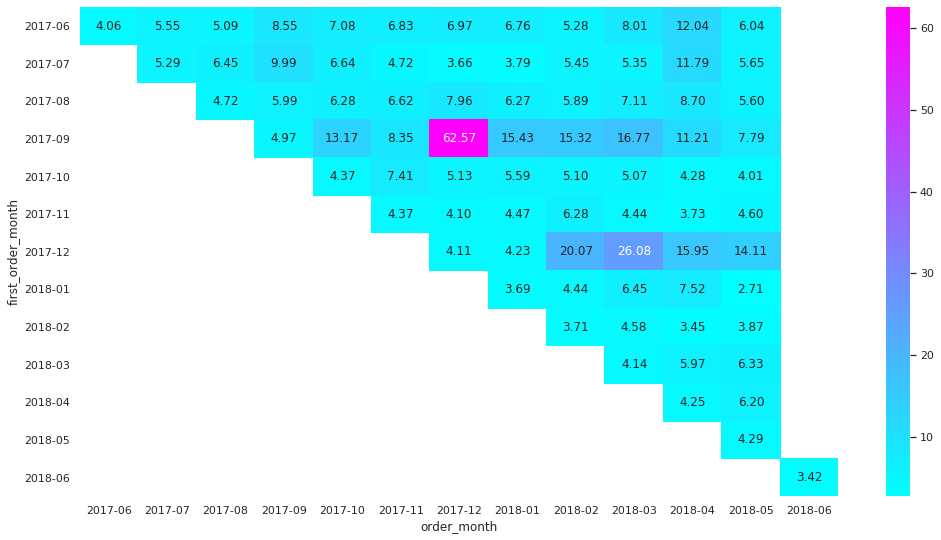

In [70]:
out_report = new_report.pivot_table(index='first_order_month', columns='order_month', values='revenu_per_user', aggfunc = 'mean')


sns.set(style='white')
plt.figure(figsize=(17, 9))
plt.title('')
sns.heatmap(out_report, annot=True, fmt='.2f',cmap="cool")

In [71]:
print('Медианный средний чек за месяц по всем когортам', new_report['revenu_per_user'].median().round(2))

Медианный средний чек за месяц по всем когортам 5.65


**Вывод:** Медианный чек в разбивке по когортам по месяцам 5.65 ед.  

Почти у всех когорт средний чек первого месяца в районе 4-5 ед. Второй месяц xenm больше. Это объясняется, с одной стороны, тем, что отпадают 90% покупателей, но те кто остаются делают более дорогие заказы, чем средний покупатель когорты 0 цикла.  
Тенденция дальнейших месяцев показывает, что средний чек не уменьшается от месяца к месяцу, что из каждой новой когорты остается какой-то пул покупателей, которые начинают делать регулярные заказы. Это хорошо.  

Различается ли средний чек по устройствам или источникам? - Точно ли это нужно делать в рамках этого проекта? В помоем понимание на исходных данных это совсем не тривиальная задача. У нас нет однозначной связи между данными таблицы visits и orders. Есть uid клиента, но на него приходится несколько действий и для каждого uid повторяется, далее нет четкой привязки по времени. Формат заказа - четкая дата, повидимому момент оплаты. Формат сессии две даты: старт и финишь сессии.  

- Как я вижу решение этой задачи. из таблицы orders создаем словарь. uid, data: revenu
- 

In [84]:
# average order by month, device and source_id

In [85]:
first_visits = visits.copy()
first_orders = orders.copy()

In [86]:
first_session = visits.groupby('uid')['start_ts'].min()

# добавим в таблицу
first_session.name = 'first_session'
first_visits = pd.merge(first_visits ,first_session  ,on='uid',how='outer')

first_visits = first_visits.loc[first_visits.start_ts == first_visits.first_session]
first_visits = first_visits [['uid', 'device', 'source_id']]

In [87]:
first_orders = first_orders.merge(first_visits, on='uid')

In [88]:
desktop = first_orders.query('device == "desktop" ')
touch = first_orders.query('device == "touch" ')

In [89]:
desktop['order_month'] = desktop['order_month'].dt.strftime('%Y-%m')
desktop_pivot = desktop.pivot_table(index='source_id', columns='order_month', values='revenue', aggfunc='mean')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


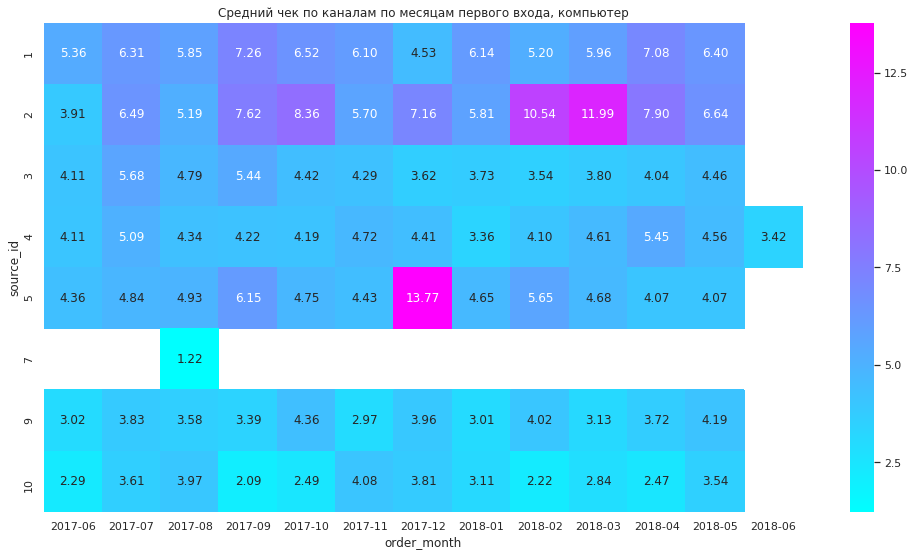

In [90]:
sns.set(style='white')
plt.figure(figsize=(17, 9))
plt.title('Средний чек по каналам по месяцам первого входа, компьютер')
sns.heatmap(desktop_pivot, annot=True, fmt='.2f',cmap="cool")

In [91]:
touch['order_month'] = touch['order_month'].dt.strftime('%Y-%m')
touch_pivot = touch.pivot_table(index='source_id', columns='order_month', values='revenue', aggfunc='mean')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


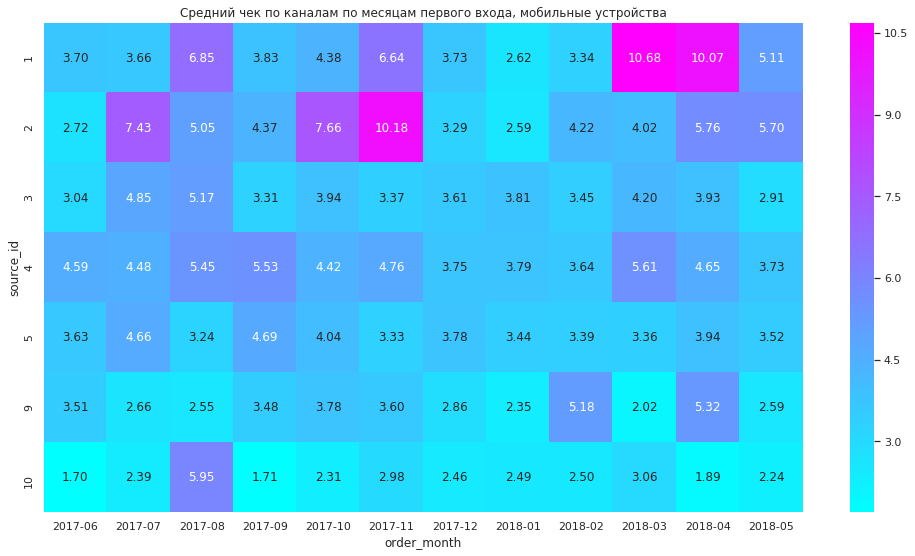

In [92]:
sns.set(style='white')
plt.figure(figsize=(17, 9))
plt.title('Средний чек по каналам по месяцам первого входа, мобильные устройства')
sns.heatmap(touch_pivot, annot=True, fmt='.2f',cmap="cool")

<div class="alert alert-block alert-info"> 
Исправление ошибок. Вывод:  
    
Рекламные каналы 6,7,8 совсем не дают заказов. Стоит отказаться либо изменить рекламное объявление  
    
Клиенты приходящие с 10 канала  имеют самый маленький средний чек.  
    
Клиенты приходящие с 1 и 2 канала чаще делают крупные заказы.  

Особой разницы между клиентами использующими touch и  desktop нет.  

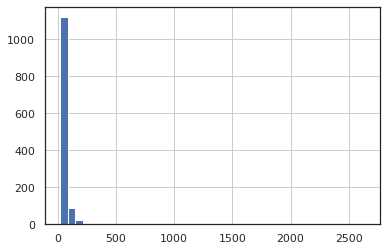

In [49]:
easy_hist(orders.loc[orders['revenue'] > 20]['revenue'], 
          bins=40, 
          title = '',
          xlabel = '',
          ylabel = ''
         )


(-1, 14)

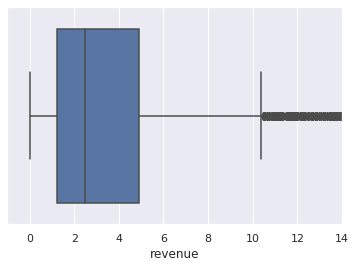

In [50]:
sns.set()
ax= sns.boxplot(x=orders.revenue)
ax.set_xlim([-1, 14])

понятие "средний чек" неоднозначно, приведу несколько вариантов

In [51]:
print("средний чек за одну покупку за все время наблюдений", orders['revenue'].mean().round(2), end='\n\n')
print("медианный чек за одну покупку за все время наблюдений", orders['revenue'].median().round(2), end='\n\n')
print("Всего за все время заработано", orders['revenue'].sum().round(2), end='\n\n')

средний чек за одну покупку за все время наблюдений 5.0

медианный чек за одну покупку за все время наблюдений 2.5

Всего за все время заработано 252057.2



**Вывод:**  
Финансовые данные обезличенные и даны условными цифрами. Средний чек за все время наблюдений составляет 5.0.

Наиболее частая мода, 2.5  
Чаще всего люди совершают покупки в районе этой цифры, но так же есть достаточно много дорогих покупок, которые улучшают отчетность.

- **Сколько денег приносят? (LTV)**

In [52]:
orders['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [53]:
costs['dt'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

In [54]:
# month
costs['month'] = costs['dt'].astype('datetime64[M]')

# количество новых покупателей по месяцам
new_buyers = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
new_buyers.columns = ['first_order_month', 'n_buyers']

# когорты по месяцам и тратам
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

# собираем в одну таблицу
report = pd.merge(new_buyers, cohorts, on='first_order_month')

# возраст когорты
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

# Итоговая прибыль с клиента LTV 

report['ltv'] = report['revenue'] / report['n_buyers']

# подготовка данных к выводу на график
report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m')

Данных в проекте по маржинальности нет. Будем считать, что маржа 100%.

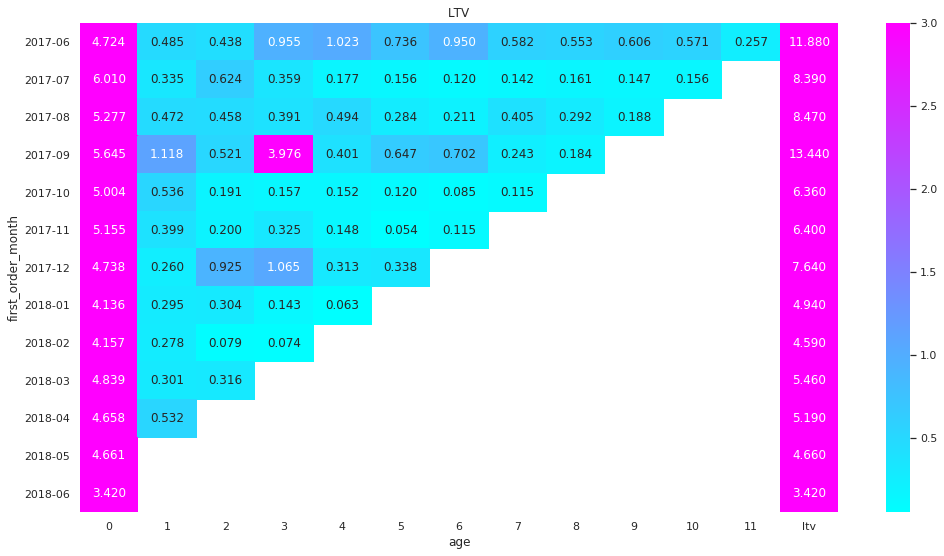

In [55]:
output = report.pivot_table(
        index='first_order_month', 
            columns='age', 
                values='ltv', 
                aggfunc='mean').round(3)


output.fillna('')

sns.set(style='white')
plt.figure(figsize=(17, 9))
plt.title('LTV')
output['ltv'] = output.sum(axis=1).round(2)
sns.heatmap(output, annot=True, fmt='.3f',vmax=3,cmap="cool")

Посмотрим LTV различных когорт за полугодие. Выберем только те когорты, которые прожили достаточно долго.

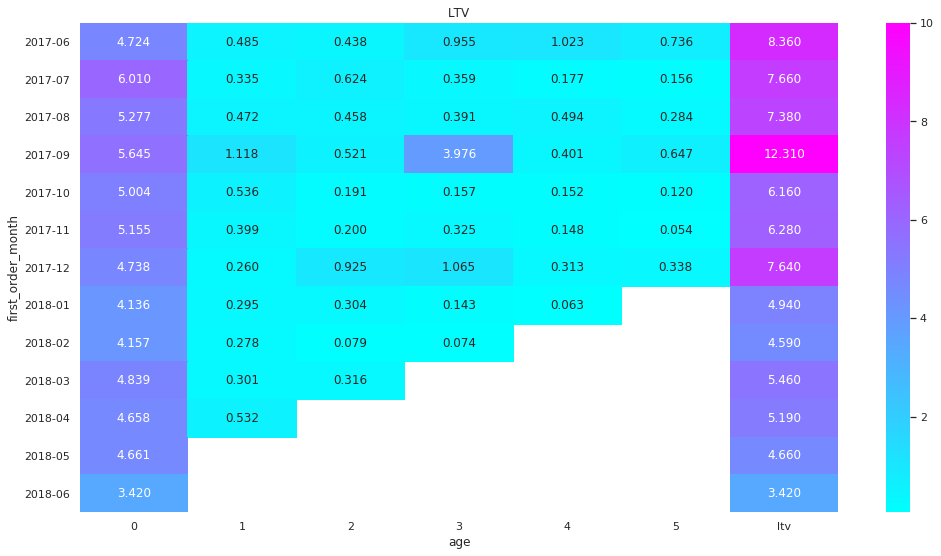

In [56]:
output = report.pivot_table(
        index='first_order_month', 
            columns='age', 
                values='ltv', 
                    aggfunc='mean').round(3)#.cumsum(axis=1)
# смотрим только полгодп жизни
output = output[[0, 1, 2, 3, 4, 5]]

sns.set(style='white')
plt.figure(figsize=(17, 9))
plt.title('LTV')
output['ltv'] = output.sum(axis=1).round(2)
sns.heatmap(output, annot=True, fmt='.3f',vmax=10,cmap="cool")

In [57]:
# подходят первые 7 когорт
print( 'Средняя итоговая прибыль с клиента за полгода LTV', (output.iloc[0:7]['ltv'].mean()).round(2))

Средняя итоговая прибыль с клиента за полгода LTV 7.97


In [58]:
# разбивка трат по кагортам
spend_per_month = costs.groupby('month').agg({'costs': 'sum'}).reset_index()
spend_per_month['month'] = spend_per_month['month'].dt.strftime('%Y-%m')

#Объеденим данные и посчитаем CAC
report_full = pd.merge(report, spend_per_month, left_on='first_order_month', right_on='month')
report_full['cac'] = report_full['costs'] / report_full['n_buyers']

# ROMI
report_full['romi'] = report_full['ltv'] / report_full['cac']

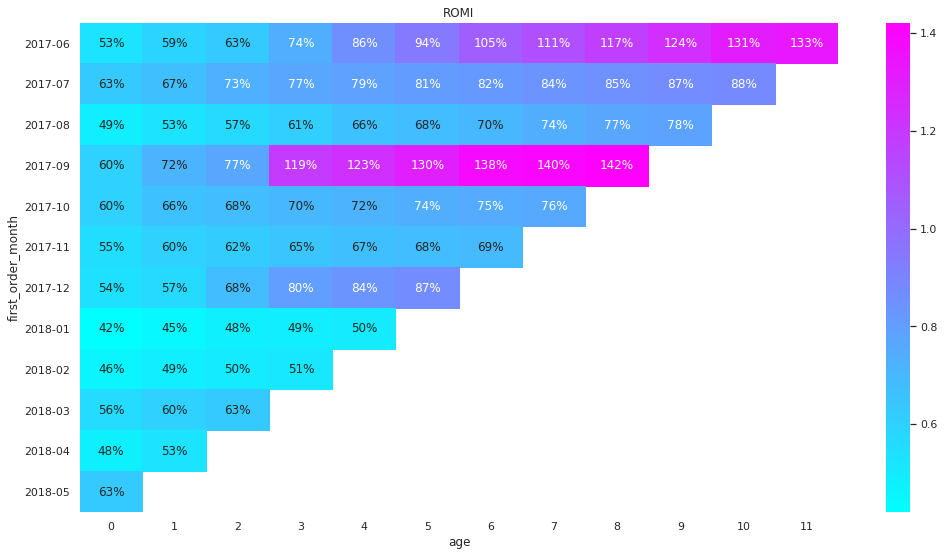

In [59]:
# Вывод
output = report_full.pivot_table(
                index='first_order_month', 
                    columns='age', 
                        values='romi', 
                            aggfunc='mean')

output = output.cumsum(axis=1).round(2)

sns.set(style='white')
plt.figure(figsize=(17, 9))
plt.title('ROMI')
sns.heatmap(output, annot=True, fmt='.0%',cmap="cool")

## Вывод:

Пока бизнес дает течь. Расходы на рекламу выше доходов.  
Только 1 и 4 кагорты вышли в плюс.  
Данных недостаточно, но можно предположить, что период окупаемости будет больше года.
4 кагорта окупилась на 4 месяц, скорей всего это связанао с несколькими случайными большими заказами.

В разрезе полугода жизни кагорты средняя итоговая прибыль с клиента LTV 7.97

Можно сделать общий вывод, что в более чем в 90% случаях рекламный бюджет вложенный в клиента приносит единичный заказ. Количество пользователей в разрезе кагорты продолжающих пользоваться сервисом регулярно менее 5%

**Маркетинг**

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)
- Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

- Сколько денег потратили? Всего / на каждый источник / по времени  

In [60]:
costs['dt'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

In [61]:
print('Всегоа на рекламу за все время т.е. с 2017-06-01 по 2018-03-03 было потрачено:', costs['costs'].sum(), '\n')

Всегоа на рекламу за все время т.е. с 2017-06-01 по 2018-03-03 было потрачено: 329131.62 



In [62]:
spend_per_source = costs.groupby('source_id').agg({'costs': 'sum'})

print('Таблица трат за все время по источникам привлечения рекламы')

spend_per_source

Таблица трат за все время по источникам привлечения рекламы


,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


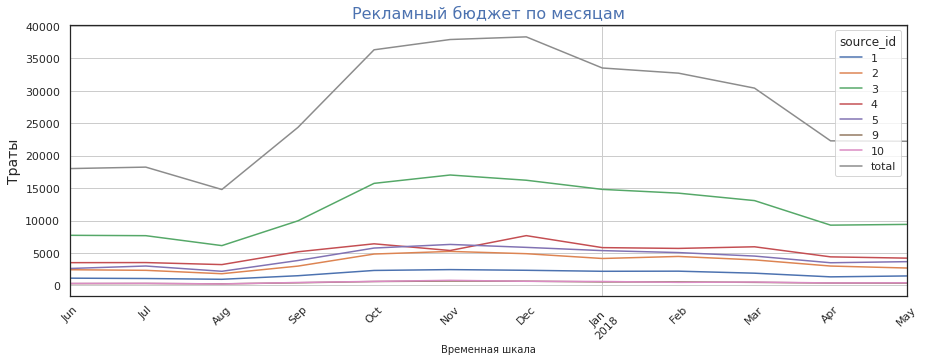

In [63]:
spend_per_time = costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')
spend_per_time['total'] = spend_per_time.sum(axis=1)


easy_plot(spend_per_time,
          title = 'Рекламный бюджет по месяцам',
          xlabel='Временная шкала',
          ylabel='Траты')

Вывод: Увеличение рекламного бюджета привело к увеличению числа входов с рекламных каналов. см. график 'Количество пользователей по месяцам'  

Всегоа на рекламу за все время т.е. с 2017-06-01 по 2018-03-03 было потрачено: 329131.62   
Всего за все время заработано 252057.2

Начиная с декабря 2017 несмотря на поддрежание трат на рекламу, поток клиентов начал спадать.


**Сколько стоило привлечение одного покупателя из каждого источника?**

CAC  — стоимость привлечения клиента  
Посчитаем все траты по всем каналам по кагортам, на нового пользователя

In [64]:
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'date', 'year',
       'month', 'week', 'duration', 'first_visits_date', 'first_month',
       'session_month', 'cohort_lifetime'],
      dtype='object')

In [65]:
orders.columns

Index(['buy_ts', 'revenue', 'uid', 'first_orders_date', 'first_visits_date',
       'time_to_buy', 'time_to_buy_sec', 'order_month', 'first_order_month'],
      dtype='object')

In [66]:
#Заработок на uid
df1 = orders.groupby('uid').agg({'revenue': 'sum'}).reset_index()
df1['revenue'].sum()

252057.2

In [67]:
df2 = visits.merge(df1, on ='uid')

In [68]:
# Сгруппируем df2 по uid и выведем первую сессию 
first_visits = visits.groupby('uid')['start_ts'].min().reset_index()

# Соеденим df2 и first_visits по uid и мин.сессии методом inner
resault = df2.merge(first_visits, on = ['uid','start_ts'], how = 'inner')
# Выведем общую выручку
resault['revenue'].sum()

252057.2

In [69]:
resault['uid'].value_counts()

8936079926008794451     1
48323333547121531       1
15995579386502233798    1
15875486844586996236    1
14266635085041064273    1
                       ..
9904185501473729811     1
11633464263598965760    1
12715883389642441051    1
2936229747118887600     1
9505264890679494151     1
Name: uid, Length: 36523, dtype: int64

Вывод: Имеем таблицу только с уникальными пользователями и их тратами на сайте

In [70]:
# заработок с канала
revenu_per_source = resault.groupby('source_id')['revenue'].sum().reset_index()
# траты на канал
costs_per_sourse = costs.groupby('source_id')['costs'].sum().reset_index()
# число пришедших с канала
source_group = resault.groupby('source_id').agg({'uid': 'nunique'}).reset_index()

In [71]:
# обединим каналы, стоимость и первый вход посетителя
costs_per_sourse = costs_per_sourse.merge(source_group,on = 'source_id')

In [72]:
# выручка и стоимость в пересчете на клиента
costs_per_sourse['cac'] = costs_per_sourse['costs'] / costs_per_sourse['uid']
costs_per_sourse = costs_per_sourse.merge(revenu_per_source ,on = 'source_id')

In [73]:
costs_per_sourse['ltv'] = costs_per_sourse['revenue'] / costs_per_sourse['uid']
costs_per_sourse['roi'] = costs_per_sourse['ltv'] / costs_per_sourse['cac'] *100
costs_per_sourse

,source_id,costs,uid,cac,revenue,ltv,roi
0,1,20833.27,2899,7.186364,31090.55,10.724577,149.235094
1,2,42806.04,3506,12.209367,46923.61,13.383802,109.619133
2,3,141321.63,10473,13.493901,54511.24,5.204931,38.572468
3,4,61073.60,10296,5.931779,56696.83,5.506685,92.833614
4,5,51757.10,6931,7.467479,52624.02,7.592558,101.674978
5,9,5517.49,1088,5.071222,5759.40,5.293566,104.384421
6,10,5822.49,1329,4.381106,4450.33,3.348631,76.433450


## Вывод:
- 0 и 1 канал по привлечению клиентов работают с прибылью 49 и 9 % соответственно.  Все хорошо.
- 4 и 5 канал тоже имеют небольшую прибыль.  1.5 и 4 % соотевтственно.
- Остальные каналы работают в "минус"  
- Только 38 % средств вложенных во второй канал вернулись назад.  


Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? 

In [74]:
costs_per_sourse.columns
costs_per_sourse = costs_per_sourse[['source_id', 'cac']]

In [75]:
df10 = resault.groupby(['device', 'source_id']).agg({'uid':'count', 'revenue':'sum'}).reset_index()
df10['revenue_per_user'] = df10['revenue'] / df10['uid']
df15 = df10.merge(costs_per_sourse, on='source_id')

In [76]:
df15['roi'] = df15['revenue_per_user'] / df15['cac'] 
df15

,device,source_id,uid,revenue,revenue_per_user,cac,roi
0,desktop,1,2264,25995.60,11.482155,7.186364,1.597770
1,touch,1,635,5094.95,8.023543,7.186364,1.116495
2,desktop,2,2649,40386.63,15.245991,12.209367,1.248713
3,touch,2,857,6536.98,7.627748,12.209367,0.624746
4,desktop,3,8724,46273.75,5.304190,13.493901,0.393081
5,touch,3,1749,8237.49,4.709828,13.493901,0.349034
6,desktop,4,7932,43414.96,5.473394,5.931779,0.922724
7,touch,4,2364,13281.87,5.618388,5.931779,0.947167
8,desktop,5,5705,46825.34,8.207772,7.467479,1.099136
9,touch,5,1226,5798.68,4.729755,7.467479,0.633380


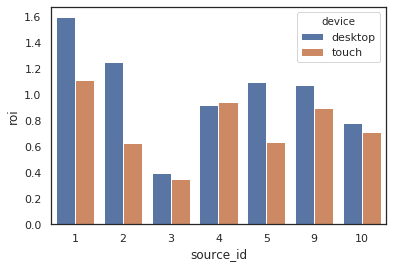

In [77]:
ax = sns.barplot(x="source_id", y="roi", hue="device", data=df15)

In [78]:
print('Количество заказов по устройствам: desktop', df15.groupby('device')['uid'].sum()[0], ' touch',
     df15.groupby('device')['uid'].sum()[1])


Количество заказов по устройствам: desktop 29210  touch 7312


## Вывод:  
C компьютера приходит большее заказов чем с "смартфонов" и конверсия рекламного бюджета в прибыль roi выше.  
29000 против 7000. 
Оба варианта имеют схожую связь между roi и источником рекламных входов.  

С учетом, что сейчас люди проводят в "телефонах" значительно больше свободного времени и предпочитают "решать вопросы на ходу" , это серьезный повод задуматься.  

Так же можно предположить проблемы в мобильном представление сайта.


**Общий вывод:**
 Было поставлено задание: помочь маркетологам оптимизировать маркетинговые затраты.
Был дан набор данных от Яндекса.Афиши с июня 2017 по конец мая 2018 года:

Что можно сказать в итоге.
Среднее количество пользователей около 900 в день или 23_000 в месяц. Для крупного сервиса не так, чтобы много. После увеличения рекламного бюджета компании число пользователей начало расти. С 11.2017 заметная тенденция к спаду активности пользователей.   

Количество сессий больше количества уникальных пользователей. Среднее количество сессий в день: 987. Это нормально - пользователь нашел сайт, запомнил и вышел, в свободное время зашел и изучил внимательней.

На временном графике виден выброс в 11.2017 и в этот же месяц начала падать активность пользователей. Возможно, это связанные события. Были ли проблемы в работе сайта, качестве сервиса, проблемы с платежами?

Наиболее часто сессии длятся менее 60 секунд. Это нормально люди зашли с поиска , поняли, что не нужно и вышли.

Менее чем, каждый 10 новый клиент превращается в постоянного, учитывая специфику (продажа билетов), это нормально и неплохо.  
Положительный момент, что из каждой когорты выходит пул постоянных покупателей и их средний чек выше, чем средней чек когорты в нулевом цикле. Есть перспективы постепенного роста.

Пока бизнес убыточен. Имеющихся данных недостаточно, но можно предположить, что период окупаемости будет больше года. 4 когорта окупилась на 4 месяц, скорей всего это связано с несколькими случайными большими заказами.  

В разрезе полугода жизни когорты средняя итоговая прибыль с клиента LTV 7.97  
Среднее количество фактических заказов в месяц 3878, с учетом, что количество посетителей порядка 23000 в месяц, каждый 10 визит приносит заказ. Это отлично.


Конверсия рекламного бюджета в заказы низкая. Фактически реклама приносит чуть более чем 1 заказа с рекламного входа, это надо учитывать при бюджетировании.

среднее время до покупки 360 секунд. Это совсем неплохо. Пользователи не испытывают проблем с сайтом.

0 и 1 канал по привлечению клиентов работают с прибылью 49 и 9 % соответственно. Все хорошо.
4 и 5 канал тоже имеют небольшую прибыль. 1.5 и 4 % соответственно.
Остальные каналы работают в "минус"
Только 38 % средств, вложенных во второй канал, вернулись назад.

можно предположить серьезную проблему в мобильном представление сайта.

Из исследования по среднему чеку в привязке к рекламным каналам стало ясно, что:  
Рекламные каналы 6,7,8 совсем не дают заказов. Стоит отказаться либо изменить подход к продвижению    
Клиенты приходящие с 10 канала имеют самый маленький средний чек.   
Клиенты приходящие с 1 и 2 канала чаще делают крупные заказы.  

Особой разницы между клиентами использующими touch и  desktop нет.  